# Report 2 MTH 448
## By: Kartik Garg 
## Person Number:50200426 
### Date: 03-17-2018
# 2016 Presidential Election State and County Distribution

## I. Introduction

The United States presidential election of 2016 was the 58th quadrennial American presidential election, held on Tuesday, November 8, 2016. The Republican ticket of businessman Donald Trump and Indiana Governor Mike Pence defeated the Democratic ticket of former Secretary of State Hillary Clinton and U.S. Senator from Virginia Tim Kaine. 

In this report, we study the 2016 Presidential Election of State and County Distribution of votes of the United States of America. First we study county wise distribution of votes, then we examine state wise distribution of votes.

## II. County wise distribution of votes.
###  We can load all the .CSV data using pandas.

In [26]:
import pandas # pandas is a software library for data manipulation
df = pandas.read_csv('2016_US_County_Level_Presidential_Results.csv',low_memory=False) # reads the file '2016_US_County_Level_Presidential_Results.csv'
df.head(n=10) # prints 10 columns of the file.

Unnamed: 0  votes_dem  votes_gop  total_votes   per_dem  per_gop    diff  \
0           0      93003     130413       246588  0.377159  0.52887  37,410   
1           1      93003     130413       246588  0.377159  0.52887  37,410   
2           2      93003     130413       246588  0.377159  0.52887  37,410   
3           3      93003     130413       246588  0.377159  0.52887  37,410   
4           4      93003     130413       246588  0.377159  0.52887  37,410   
5           5      93003     130413       246588  0.377159  0.52887  37,410   
6           6      93003     130413       246588  0.377159  0.52887  37,410   
7           7      93003     130413       246588  0.377159  0.52887  37,410   
8           8      93003     130413       246588  0.377159  0.52887  37,410   
9           9      93003     130413       246588  0.377159  0.52887  37,410   

  per_point_diff state_abbr county_name  combined_fips  
0         15.17%         AK      Alaska           1001  
1         15.17%         AK      Alaska           1003  
2         15.17%         AK      Alaska           1005  
3         15.17%         AK      Alaska           1007  
4         15.17%         AK      Alaska           1009  
5         15.17%         AK      Alaska           1011  
6         15.17%         AK      Alaska           1013  
7         15.17%         AK      Alaska           1015  
8         15.17%         AK      Alaska           1017  
9         15.17%         AK      Alaska           1019

###  USA.svg is the file we want to modify.

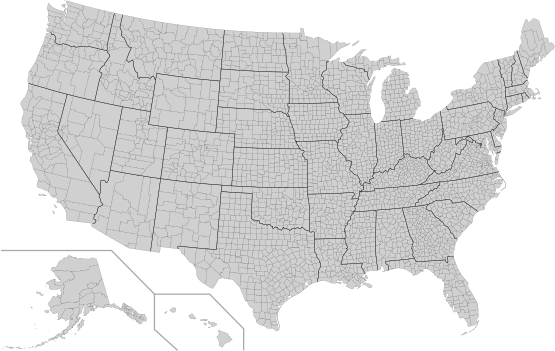

In [27]:
from IPython.core.display import SVG
SVG(filename='USA.svg') # prints the file "USA.svg"

###  We create a list which contains all the FIPS data and Total Votes from each county and name it "total_votes".
 
If we type in FIPS of any county, we can get the total votes from that county.

In [28]:
df['combined_fips'] #contains all the combined fips row data.
total_votes = {df['combined_fips'][i]:df['total_votes'][i] for i in range(0,len(df['combined_fips']))} # we create a set of all the data which contains combined fips and total votes.
total_votes[1001] #for the fips code it gives the number of total votes

246588

#### We create 3 lists which contain votes for democratic party, votes for democratic party, and the fips for each county and name it "democratic", "republican" and "fips".

In [29]:
democratic=df['votes_dem'].tolist()# votes_dem is converted into a list named democratic
republican=df['votes_gop'].tolist()# votes_gop is converted into a list named republican
fips=df['combined_fips'].tolist()# combined_fips is converted into a list named fips

###  We display number of counties which voted more for DEMOCRATIC party and the number of counties which voted more for REPUBLICAN party.

In [30]:
dem=rep=0 # create two counters
for i in range(len(fips)):
        if democratic[i]>republican[i]: 
            dem+= 1 # if votes of democratic is more than votes of republicans add+1 to the counter.
        else: rep+= 1 # if votes of republican is more than votes of democratic add+1 to the counter.
print('Number of counties which voted more for DEMOCRATIC party: {} \nNumber of counties which voted more for REPUBLICAN party: {}'.format(dem, rep)) # display the number of counties which voted more each party. 

Number of counties which voted more for DEMOCRATIC party: 487 
Number of counties which voted more for REPUBLICAN party: 2654


###  Create a new colored .svg named "cmap1".

USA1.svg contains a new svg with tags for color of republican and democratic party(which I added using inkscape)

In [31]:
from lxml import etree
with open('USA1.svg') as f: # opens USA1.svg file 
    doc = etree.fromstring(f.read().encode('utf-8')) # save the data of USA1.svg to doc.

for i,item in enumerate(doc): #iterate through each char in doc
    if 'style' in item.attrib:
        for r in range(len(fips)): #iterate through fips list
            temp= str(fips[r]) #save the fips in temp variable
            if len(temp)<5: 
                temp="0"+temp # for the 4 digit fips code add "0" in front to make it 5 digit code
            if item.attrib['id'] ==temp: # if id (contains fips in USA.svg) is equal to the fips code in our list.
                if democratic[r]>republican[r]: 
                    item.attrib['style'] = item.attrib['style'].replace('fill:#d0d0d0','fill:'+'#6f62fa') # if vote of democratic is more than the vote o republican for the county, fill red color.
                else:
                    item.attrib['style'] = item.attrib['style'].replace('fill:#d0d0d0','fill:'+'#e5293c') # if vote of republican is more than the vote o democratic for the county, fill blue color.


with open('cmap1.svg','w') as f: 
    f.write(etree.tostring(doc).decode('utf-8')) #create a new cmap1.svg and write the new data.

#### This .svg file displays the county wise distribution of votes among the republican and democratic party. 

County which voted more for Republican Party is in Red color (the color of republican party) and the county which voted more for democratic party is in Blue color(the color of democratic party)
 
Since the 2000 United States presidential election, red states and blue states have referred to states of the United States whose voters predominantly choose either the Republican Party (red) or Democratic Party (blue) presidential candidates. Since then, the use of the term has been expanded to differentiate between states being perceived as liberal and those perceived as conservative. Examining patterns within states reveals that the reversal has happened at the state level but is more complicated locally, with urban/rural divides associated with many of the largest changes.

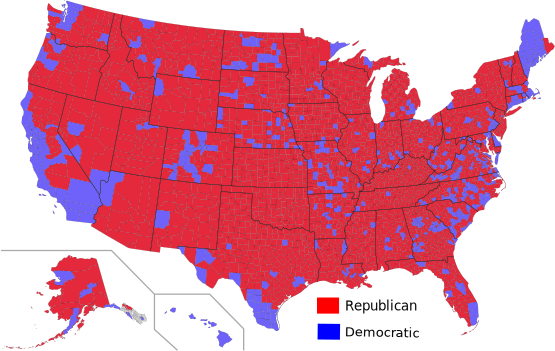

In [32]:
from IPython.core.display import SVG
SVG(filename='cmap1.svg') # dipslay the new cmap1 image which contains the new data.

This red blue map is for Republican and Democrat, Trump and Hillary. It is clear from the map that almost the whole country voted for Trump, except for California, New Mexico, south Texas, and south Florida, which are all well known to have extremely high populations of illegal immigrants. These areas have upwards of 70% of the population of illegal immigrants, with some areas as much as 90% or more illegal immigrants, mostly from Mexico.

The other two exceptions are the deep inner cities of the South, which contain the next-highest populations of welfare recipients (areas with the highest illegal population, especially southern California, have the highest levels of welfare recipients). You will also note that these areas in the deep South that voted Democrat also have the highest populations of Africans in the United States. 

# III. Creating a new .csv file using SQL.

### Using SQL we create a new .csv file which contains sum of all the votes for Republican and Democratic party sorted by State name.

 I also added the FIPS code for each state from an external source.


C:\Users\gargk>votes.db
'votes.db' is not recognized as an internal or external command,
operable program or batch file.

C:\Users\gargk>sqlite3 votes.db
SQLite version 3.22.0 2018-01-22 18:45:57
Enter ".help" for usage hints.
sqlite> .mode csv
sqlite> .separator ,
 sqlite> .import temp.csv votes
sqlite> CREATE VIEW state_view AS SELECT state_abbr,SUM(votes_dem),SUM(votes_gop) from votes GROUP BY state_abbr;
sqlite> .output votes_states.csv
sqlite> SELECT state_abbr,SUM(votes_dem),SUM(votes_gop) from state_view;
Error: no such column: votes_dem
sqlite> SELECT * from state_view;
sqlite>


### A screen-shot of SQL working on the terminal.

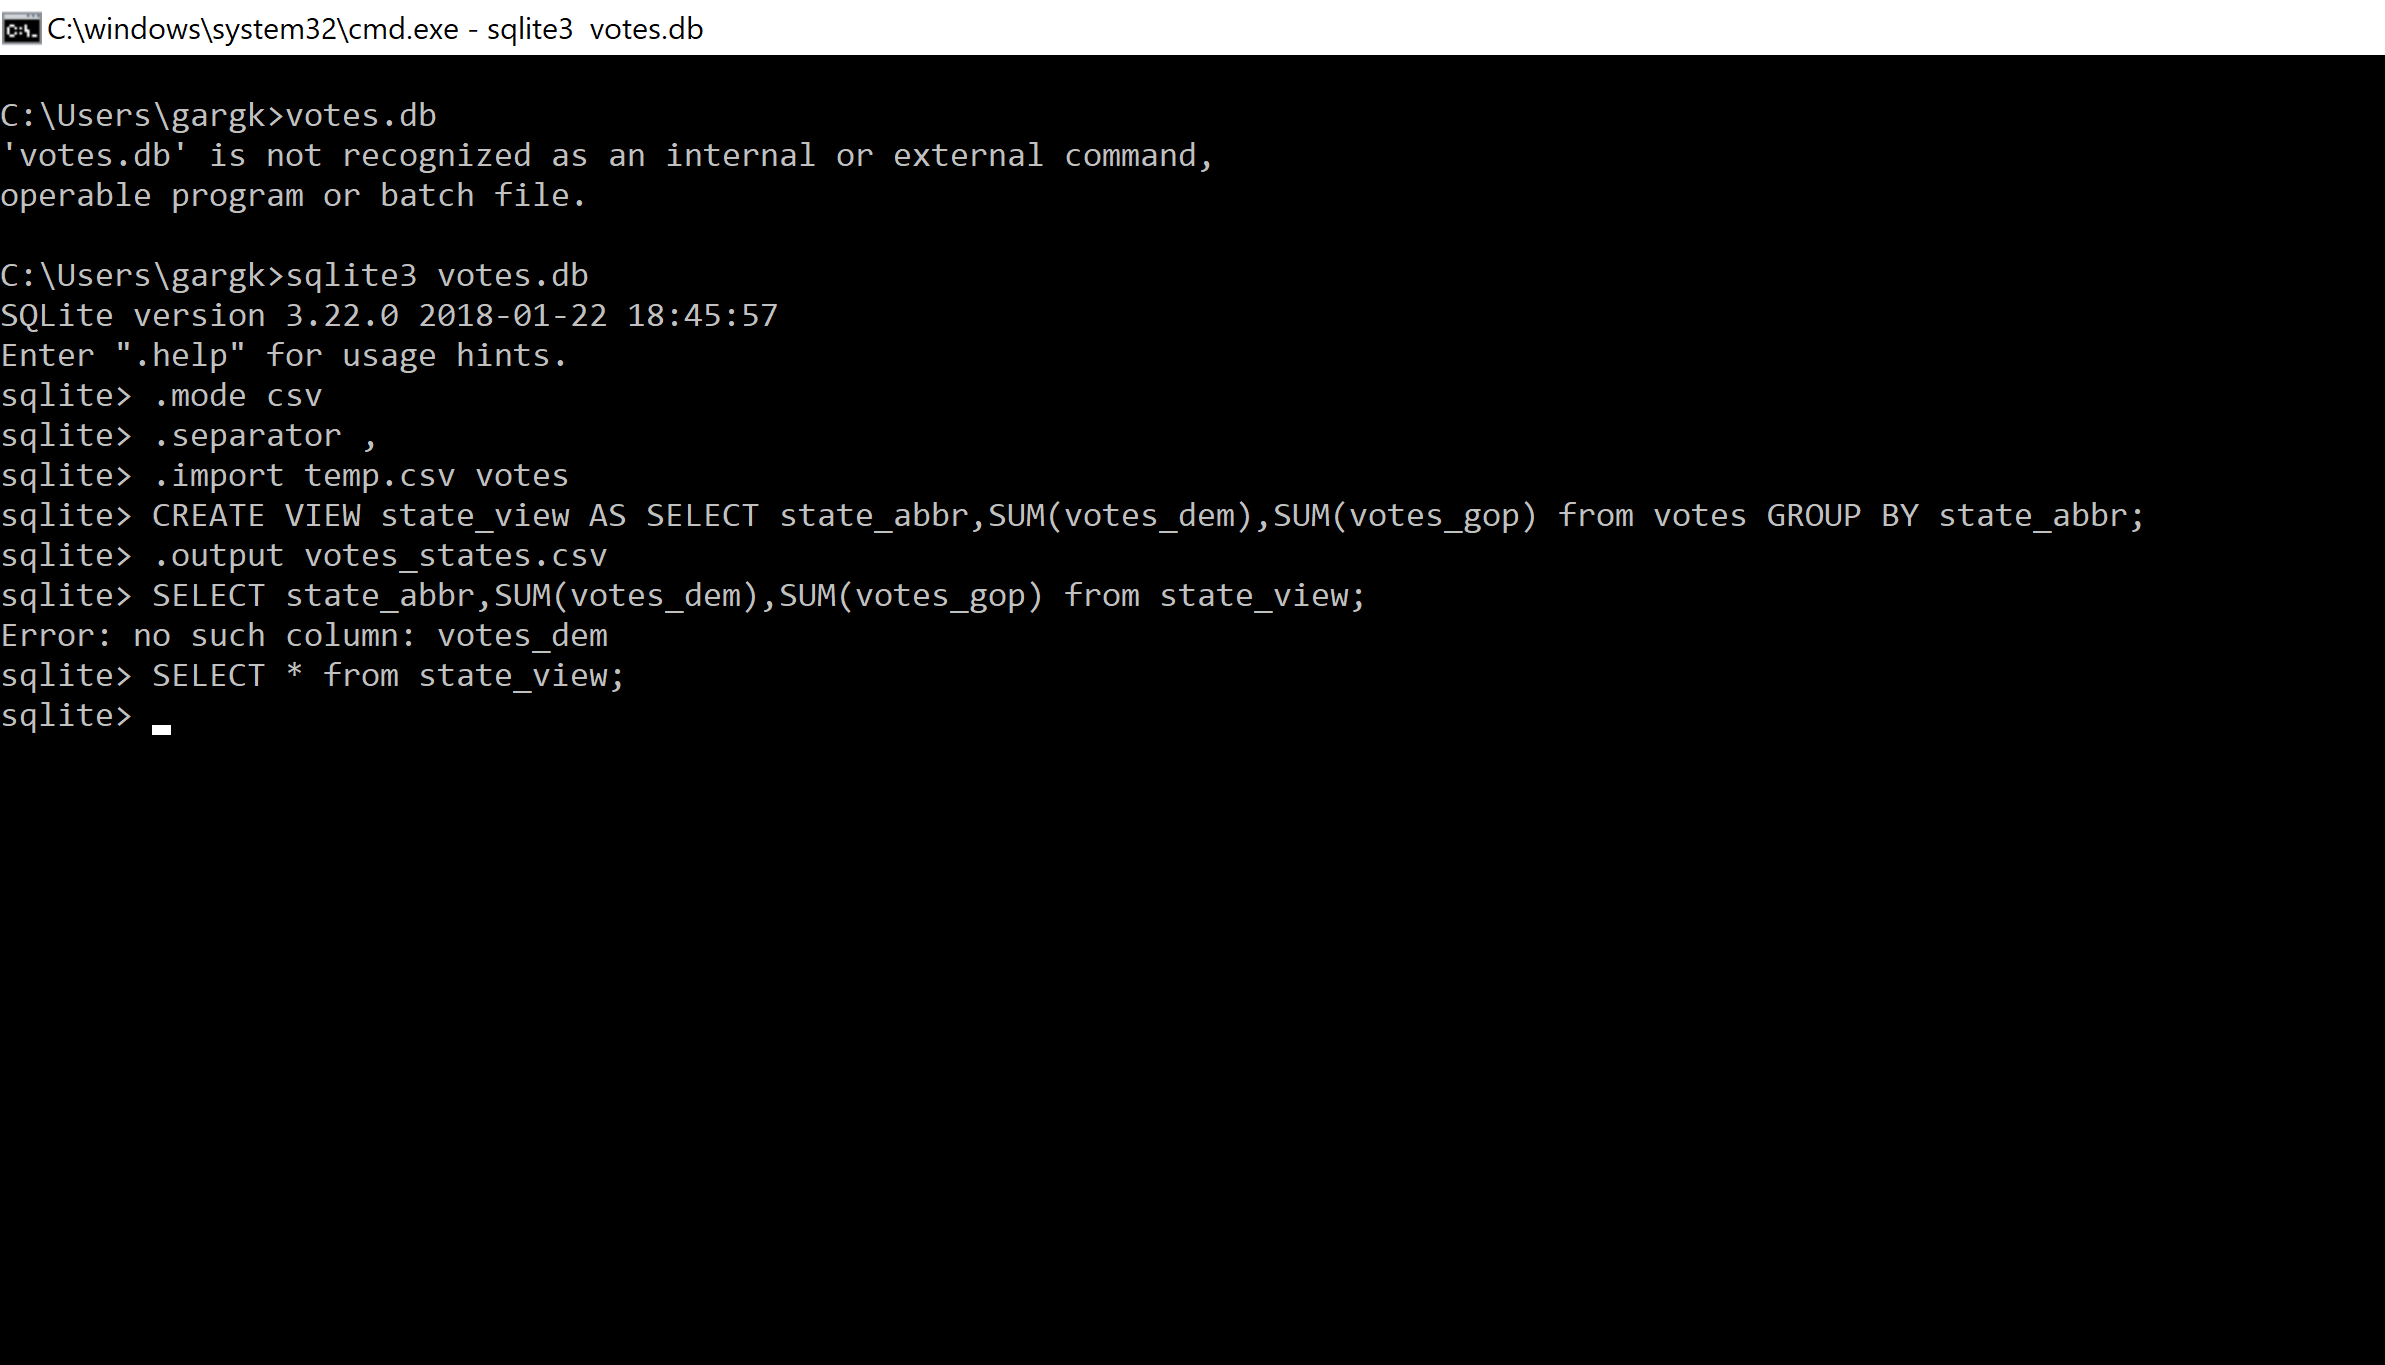

In [33]:
from IPython.display import Image
Image('Command_Prompt.png',width=700) # display an image in the hard disk

## IV. Using the new database for state wise distribution of votes.

### Using pandas we load the new .csv file and read its data.

In [34]:
import pandas  # pandas is a software library for data manipulation
df1 = pandas.read_csv('votes.csv',low_memory=False) # reads the new file 'votes.csv'
df1.head(n=10) # prints 10 columns of the file.

states  dem_votes  gop_votes  FIPS State Numeric Code
0     AK    2697087    3781977                        2
1     AL     718084    1306925                        1
2     AR     378729     677904                        5
3     AZ     936250    1021154                        4
4     CA    7362490    3916209                        6
5     CO    1212209    1137455                        8
6     CT     884432     668266                        9
7     DC     260223      11553                       11
8     DE     235581     185103                       10
9     FL    4485745    4605515                       12

#### We create 3 lists which contain votes for democratic party, votes for democratic party, and the fips for each state and name it "state_democratic", "state_republican" and "state_fips".

In [35]:
state_democratic=df1['dem_votes'].tolist() # dem_votes is converted into a list named state_democratic
state_republican=df1['gop_votes'].tolist() # gop_votes is converted into a list named state_republican
state_fips=df1['FIPS State Numeric Code'].tolist() # FIPS State Numeric Code is converted into a list named state_fips

###  We display number of states which voted more for DEMOCRATIC party and the number of counties which voted more for REPUBLICAN party.

In [36]:
state_dem=state_rep=0 # create two counters
for i in range(len(state_fips)):
        if state_democratic[i]>state_republican[i]: 
            state_dem+= 1 # if votes of democratic is more than votes of republicans add+1 to the counter.
        else: state_rep+= 1 # if votes of republican is more than votes of democratic add+1 to the counter.
print('Number of states which voted more for DEMOCRATIC party: {} \nNumber of states which voted more for REPUBLICAN party: {}'.format(state_dem, state_rep))

Number of states which voted more for DEMOCRATIC party: 21 
Number of states which voted more for REPUBLICAN party: 30


###  Create a new colored .svg named "cmap1".


In [37]:
from lxml import etree 
with open('USA1.svg') as f1: # opens USA1.svg file
    doc1 = etree.fromstring(f1.read().encode('utf-8')) # save the data of USA1.svg to doc1.

for i,item in enumerate(doc1): #iterate through each char in doc1
    if 'style' in item.attrib:
        ids=item.attrib['id']
        for r in range(len(state_fips)): #iterate through state_fips list
            temp1= str(state_fips[r]) #save the fips in temp1 variable
            if len(temp1)<2:
                temp1="0"+temp1 # for the 1 digit fips code add "0" in front to make it 2 digit code
            if ids[0:2] ==temp1: # if first two characters of id(contains fips in USA1.svg) is equal to the fips code in our list.
                if state_democratic[r]>state_republican[r]: 
                    item.attrib['style'] = item.attrib['style'].replace('fill:#d0d0d0','fill:'+'#6f62fa') # if vote of democratic is more than the votes of republican for the county, fill red color.
                else:
                    item.attrib['style'] = item.attrib['style'].replace('fill:#d0d0d0','fill:'+'#e5293c') # if vote of republican is more than the votes of democratic for the county, fill blue color.


with open('cmap3.svg','w') as f1:
    f1.write(etree.tostring(doc1).decode('utf-8')) #create a new cmap3.svg and write the new data.

#### This .svg file displays the state wise distribution of votes among the republican and democratic party. 
The States which voted more for Republican Party is in Red color(the color of republican party) and the county which voted more for democratic party is in Blue color(the color of democratic party)

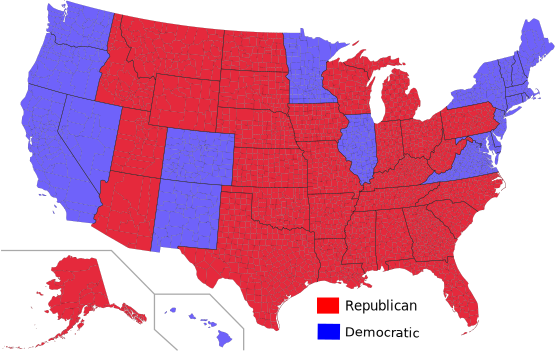

In [38]:
from IPython.core.display import SVG
SVG(filename='cmap3.svg') # dipslay the new cmap3 image which contains the new data.

The states are colored red or blue to indicate whether a majority of their voters voted for the Republican candidate, Donald Trump was the Republican candidate, Hillary Clinton was the Democratic candidate, respectively in the 2016 Presidential Election. 

From the code below we can see that, the number of people who voted for the Republican candidate Donald Trump was lower than the Hilary Clinton.However, in a surprise victory, the Republican ticket of businessman Donald Trump and Indiana Governor Mike Pence defeated the Democratic ticket of former Secretary of State Hillary Clinton and U.S. Senator from Virginia Tim Kainebecause of state wise majority.

### Number of people who voted for each party

In [39]:
d= sum(state_democratic) #calculates the sum of votes for democratic party
r= sum(state_republican) #calculates the sum of votes for republican party
print('Number of people who voted for DEMOCRATIC party: {} \nNumber of people who voted for REPUBLICAN party: {}'.format(d, r))

Number of people who voted for DEMOCRATIC party: 65125819 
Number of people who voted for REPUBLICAN party: 64846820





# V. CODE

In [40]:
import pandas # pandas is a software library for data manipulation
df = pandas.read_csv('2016_US_County_Level_Presidential_Results.csv',low_memory=False) # reads the file '2016_US_County_Level_Presidential_Results.csv'
df.head(n=10) # prints 10 columns of the file.

from IPython.core.display import SVG
SVG(filename='USA.svg') # prints the file "USA.svg"

df['combined_fips'] #contains all the combined fips row data.
total_votes = {df['combined_fips'][i]:df['total_votes'][i] for i in range(0,len(df['combined_fips']))} # we create a set of all the data which contains combined fips and total votes.
total_votes[1001] #for the fips code it gives the number of total votes

democratic=df['votes_dem'].tolist()# votes_dem is converted into a list named democratic
republican=df['votes_gop'].tolist()# votes_gop is converted into a list named republican
fips=df['combined_fips'].tolist()# combined_fips is converted into a list named fips

dem=rep=0 # create two counters
for i in range(len(fips)):
        if democratic[i]>republican[i]: 
            dem+= 1 # if votes of democratic is more than votes of republicans add+1 to the counter.
        else: rep+= 1 # if votes of republican is more than votes of democratic add+1 to the counter.
print('Number of counties which voted more for DEMOCRATIC party: {} \nNumber of counties which voted more for REPUBLICAN party: {}'.format(dem, rep)) # display the number of counties which voted more each party.

from lxml import etree
with open('USA1.svg') as f: # opens USA1.svg file 
    doc = etree.fromstring(f.read().encode('utf-8')) # save the data of USA1.svg to doc.

for i,item in enumerate(doc): #iterate through each char in doc
    if 'style' in item.attrib:
        for r in range(len(fips)): #iterate through fips list
            temp= str(fips[r]) #save the fips in temp variable
            if len(temp)<5: 
                temp="0"+temp # for the 4 digit fips code add "0" in front to make it 5 digit code
            if item.attrib['id'] ==temp: # if id (contains fips in USA.svg) is equal to the fips code in our list.
                if democratic[r]>republican[r]: 
                    item.attrib['style'] = item.attrib['style'].replace('fill:#d0d0d0','fill:'+'#6f62fa') # if vote of democratic is more than the vote o republican for the county, fill red color.
                else:
                    item.attrib['style'] = item.attrib['style'].replace('fill:#d0d0d0','fill:'+'#e5293c') # if vote of republican is more than the vote o democratic for the county, fill blue color.


with open('cmap1.svg','w') as f: 
    f.write(etree.tostring(doc).decode('utf-8')) #create a new cmap1.svg and write the new data.
    
from IPython.core.display import SVG
SVG(filename='cmap1.svg') # dipslay the new cmap1 image which contains the new data.

from IPython.display import Image
Image('Command_Prompt.png',width=700) # display an image in the hard disk

import pandas  # pandas is a software library for data manipulation
df1 = pandas.read_csv('votes.csv',low_memory=False) # reads the new file 'votes.csv'
df1.head(n=10) # prints 10 columns of the file.

state_democratic=df1['dem_votes'].tolist() # dem_votes is converted into a list named state_democratic
state_republican=df1['gop_votes'].tolist() # gop_votes is converted into a list named state_republican
state_fips=df1['FIPS State Numeric Code'].tolist() # FIPS State Numeric Code is converted into a list named state_fips

state_dem=state_rep=0 # create two counters
for i in range(len(state_fips)):
        if state_democratic[i]>state_republican[i]: 
            state_dem+= 1 # if votes of democratic is more than votes of republicans add+1 to the counter.
        else: state_rep+= 1 # if votes of republican is more than votes of democratic add+1 to the counter.
print('Number of states which voted more for DEMOCRATIC party: {} \nNumber of states which voted more for REPUBLICAN party: {}'.format(state_dem, state_rep))

from lxml import etree 
with open('USA1.svg') as f1: # opens USA1.svg file
    doc1 = etree.fromstring(f1.read().encode('utf-8')) # save the data of USA1.svg to doc1.

for i,item in enumerate(doc1): #iterate through each char in doc1
    if 'style' in item.attrib:
        ids=item.attrib['id']
        for r in range(len(state_fips)): #iterate through state_fips list
            temp1= str(state_fips[r]) #save the fips in temp1 variable
            if len(temp1)<2:
                temp1="0"+temp1 # for the 1 digit fips code add "0" in front to make it 2 digit code
            if ids[0:2] ==temp1: # if first two characters of id(contains fips in USA1.svg) is equal to the fips code in our list.
                if state_democratic[r]>state_republican[r]: 
                    item.attrib['style'] = item.attrib['style'].replace('fill:#d0d0d0','fill:'+'#6f62fa') # if vote of democratic is more than the votes of republican for the county, fill red color.
                else:
                    item.attrib['style'] = item.attrib['style'].replace('fill:#d0d0d0','fill:'+'#e5293c') # if vote of republican is more than the votes of democratic for the county, fill blue color.


with open('cmap3.svg','w') as f1:
    f1.write(etree.tostring(doc1).decode('utf-8')) #create a new cmap3.svg and write the new data.
    
from IPython.core.display import SVG
SVG(filename='cmap3.svg') # dipslay the new cmap3 image which contains the new data.

d= sum(state_democratic) #calculates the sum of votes for democratic party
r= sum(state_republican) #calculates the sum of votes for republican party
print('Number of people who voted for DEMOCRATIC party: {} \nNumber of people who voted for REPUBLICAN party: {}'.format(d, r))

Number of counties which voted more for DEMOCRATIC party: 487 
Number of counties which voted more for REPUBLICAN party: 2654
Number of states which voted more for DEMOCRATIC party: 21 
Number of states which voted more for REPUBLICAN party: 30
Number of people who voted for DEMOCRATIC party: 65125819 
Number of people who voted for REPUBLICAN party: 64846820


# VI. REFERENCES

### Source file references:
#### 2016 Presidential County level data from: https://github.com/tonmcg/County_Level_Election_Results_12-16/blob/master/2016_US_County_Level_Presidential_Results.csv

#### USA.svg from: http://www.acsu.buffalo.edu/~danet/Sp18/MTH448/class11/class11_files/report2_pointers.html

### Data analysis references:
#### http://thoughtfulreading.com/politics/live-map-united-states-2016-presidential-election-voters-party-by-state-county-analysis-of-voters-illegal-immigration-correlation-republican-democrat-red-blue-voting-map/

#### https://en.wikipedia.org/wiki/United_States_presidential_election,_2016

#### https://en.wikipedia.org/wiki/United_States_presidential_election,_2016

#### https://www.270towin.com/2016_Election/